In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv(r'C:\Users\Shivani Yadav\Downloads\archive (3)\spam.csv', encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [6]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy 

1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# dropping the columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample()

,v1,v2
2682,ham,I got a call from a landline number. . . I am ...


In [8]:
# renaming the columns
df.rename(columns={'v1': 'target', 'v2' : 'text' },inplace=True)

In [9]:
df.sample()

,target,text
531,ham,What Today-sunday..sunday is holiday..so no wo...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.sample(10)

,target,text
4008,0,Ha... Then we must walk to everywhere... Canno...
1994,0,Have you been practising your curtsey?
4068,0,Hope youåÕre not having too much fun without m...
759,0,"Call me when you/carlos is/are here, my phone'..."
190,1,Are you unique enough? Find out from 30th Augu...
4449,0,"Awesome, be there in a minute"
4474,0,We will meet soon princess! Ttyl!
1152,0,Ok i go change also...
1574,0,My sis is catching e show in e afternoon so i'...
1932,0,Jus finished avatar nigro


In [13]:
# missing values
df.isnull()

,target,text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# no. of duplicate values
df.duplicated().sum()

403

In [16]:
# dropping the duplicate values
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

2. EDA

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [21]:
import matplotlib.pyplot as plt

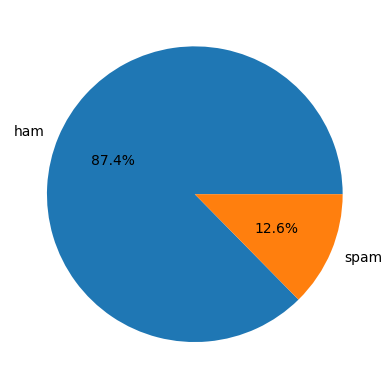

In [22]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%1.1f%%')
plt.show()

In [23]:
# Data is imblanced
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Shivani
[nltk_data]     Yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
# no. of characters
df['num_characters'] = df['text'].apply(len)

In [26]:
df.tail()

,target,text,num_characters
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125
5571,0,Rofl. Its true to its name,26


In [27]:
# no. of words
df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
# no. of words
df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

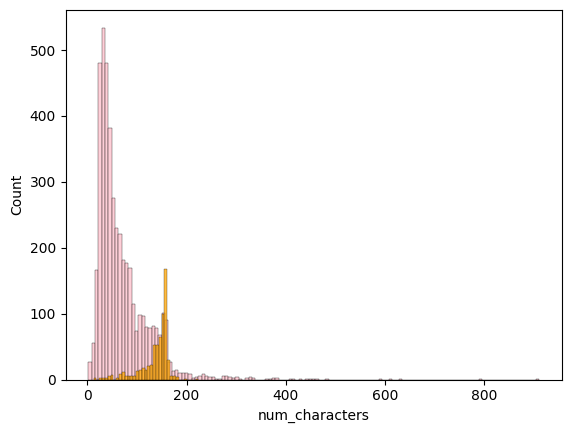

In [35]:
sns.histplot(df[df['target']==0]['num_characters'],color='pink')
sns.histplot(df[df['target']==1]['num_characters'],color='orange')

<Axes: xlabel='num_words', ylabel='Count'>

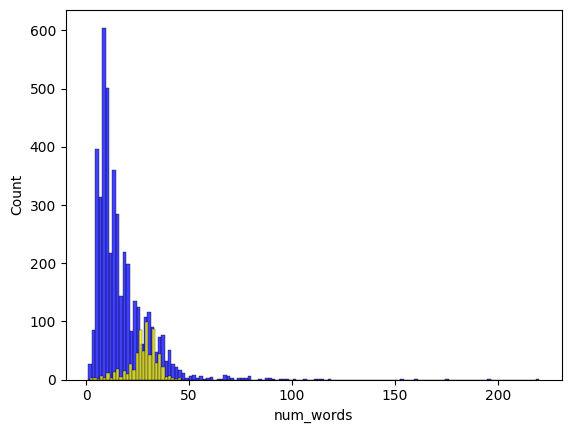

In [36]:
sns.histplot(df[df['target']==0]['num_words'],color='blue')
sns.histplot(df[df['target']==1]['num_words'],color='yellow')

<Axes: xlabel='num_sentences', ylabel='Count'>

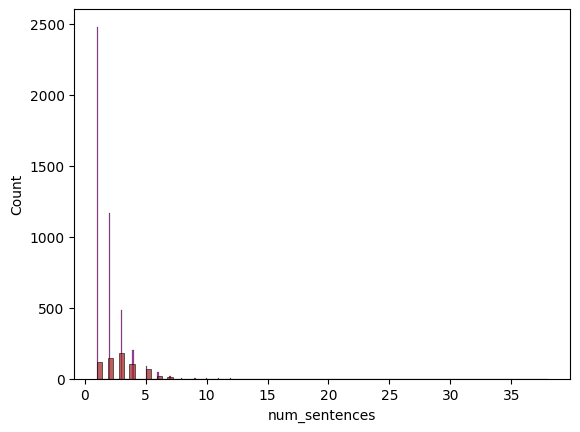

In [37]:
sns.histplot(df[df['target']==0]['num_sentences'],color='purple')
sns.histplot(df[df['target']==1]['num_sentences'],color='brown')

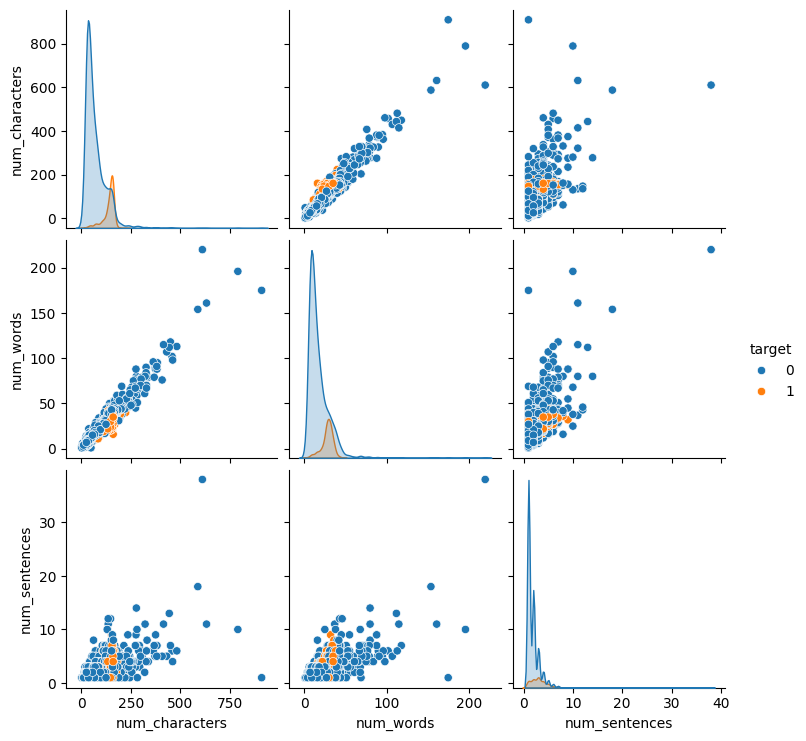

In [38]:
sns.pairplot(df,hue='target')

<Axes: >

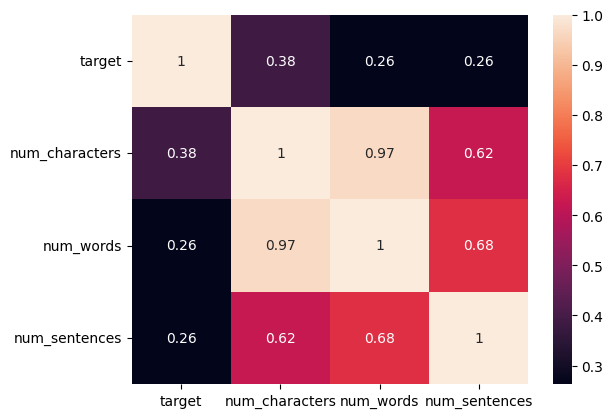

In [39]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

3. Data Preprocessing

i.   Lower case 
ii.  Tokenization
iii. Removing special characters
iv.  Removing stop words and punctuation
v.   Stemming

In [40]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

In [41]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Shivani
[nltk_data]     Yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Shivani
[nltk_data]     Yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
ps = PorterStemmer()

In [44]:
def transform_text(text):
    text= text.lower()
    text=nltk.word_tokenize(text)
    
    y= []
    for i in text:
        if i.isalnum():
            y.append(i)
        
    text= y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text= y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)      

In [45]:
text="I'm gonna be home soon and i don't want to talk about this stuff anymore tonight ,k? I've cried enough today"
transformed_text= transform_text(text)
print(transformed_text)

gon na home soon want talk stuff anymor tonight k cri enough today


In [46]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [47]:
ps.stem('loving')

'love'

In [48]:
df['transformed_text']=df['text'].apply(transform_text)

In [49]:
# Text Vectorization
# using bag of words
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc= WordCloud (width=500, height=500, min_font_size=10, background_color='white')

In [51]:
spam_text=df[df['target']==1]['transformed_text'].str.cat(sep=" ")

In [52]:
spam_wc= wc.generate(spam_text)

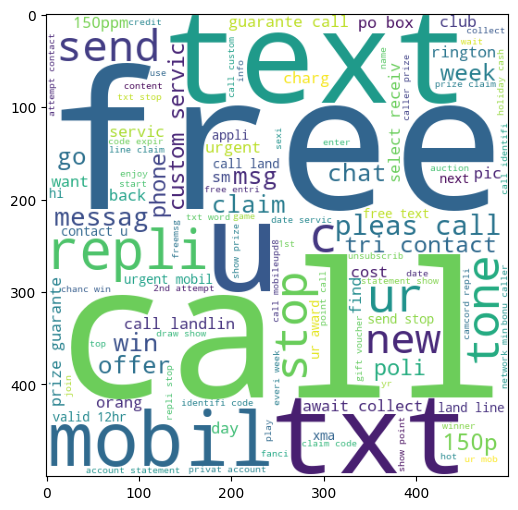

In [53]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [54]:
ham_text= df[df['target']==0]['transformed_text'].str.cat(sep=" ")

In [55]:
ham_wc= wc.generate(ham_text)

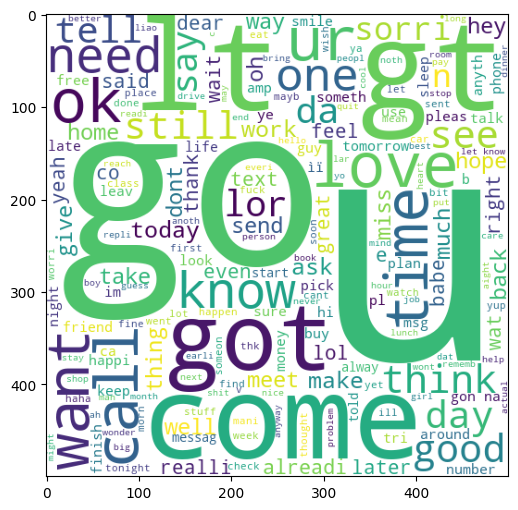

In [56]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [57]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [58]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [59]:
len(spam_corpus)

9939

In [60]:
from collections import Counter
df1=pd.DataFrame(Counter(spam_corpus).most_common(30))

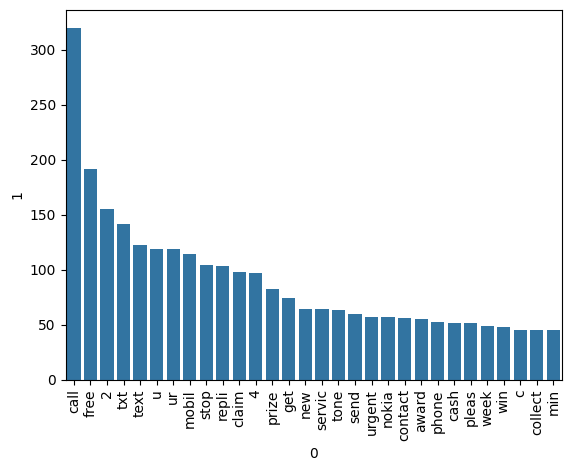

In [61]:
sns.barplot(x=df1[0],y=df1[1])
plt.xticks(rotation='vertical')
plt.show()

In [62]:
ham_corpus= []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [63]:
len(ham_corpus)


35404

In [64]:
from collections import Counter

In [65]:
df2=pd.DataFrame(Counter(ham_corpus).most_common(30))

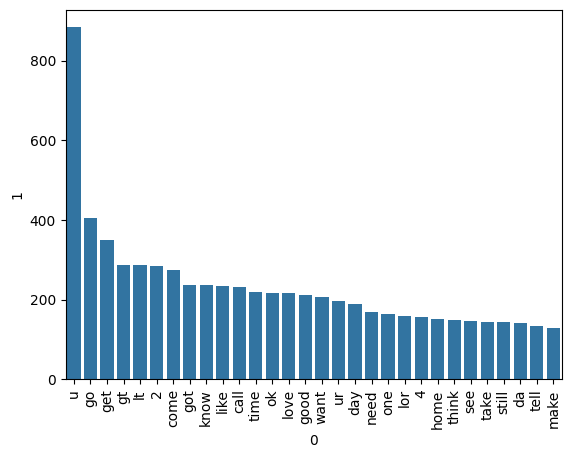

In [66]:
sns.barplot(x=df2[0],y=df2[1])
plt.xticks(rotation='vertical')
plt.show()

In [67]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)

In [68]:
X= tfidf.fit_transform(df['transformed_text']).toarray()

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X=  scaler.fit_transform(X)

In [70]:
# appending the num_character col to X
X= np. hstack((X, df['num_characters'].values.reshape(-1,1)))

In [71]:
X.shape

(5169, 3001)

In [72]:
y= df['target'].values

In [73]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [76]:
X_train

array([[ 0.,  0.,  0., ...,  0.,  0., 71.],
       [ 0.,  0.,  0., ...,  0.,  0., 25.],
       [ 0.,  0.,  0., ...,  0.,  0., 54.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., 65.],
       [ 0.,  0.,  0., ...,  0.,  0., 42.],
       [ 0.,  0.,  0., ...,  0.,  0., 95.]])

In [77]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [79]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [80]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8907156673114119
[[800  96]
 [ 17 121]]
0.5576036866359447


In [81]:
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738878143133463
[[890   6]
 [ 21 117]]
0.9512195121951219


In [82]:
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


#tfidf --> MNB

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [84]:
svc= SVC(kernel='sigmoid', gamma=1.0)
knc= KNeighborsClassifier()
mnb= MultinomialNB()
dtc= DecisionTreeClassifier(max_depth=5)
lrc= LogisticRegression(solver='liblinear',penalty='l1')
rfc= RandomForestClassifier(n_estimators=50, random_state=2)
abc= AdaBoostClassifier(n_estimators=50, random_state=2)
bc= BaggingClassifier(n_estimators=50, random_state=2)
etc= ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt= GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb= XGBClassifier(n_estimator=50, random_state=2)


In [85]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [86]:
from sklearn.metrics import accuracy_score,precision_score

In [87]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [88]:
accuracies= []
precisions= []
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For",name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)
    
    accuracies.append(current_accuracy)
    precisions.append(current_precision)


c:\Users\Shivani Yadav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For SVC
Accuracy - 0.8665377176015474
Precision - 0.0
For KN
Accuracy - 0.8858800773694391
Precision - 0.8333333333333334
For NB
Accuracy - 0.9738878143133463
Precision - 0.9512195121951219
For DT
Accuracy - 0.9448742746615088
Precision - 0.8785046728971962
For LR
Accuracy - 0.965183752417795
Precision - 0.9553571428571429
For RF
Accuracy - 0.9690522243713733
Precision - 0.9818181818181818


c:\Users\Shivani Yadav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy - 0.9642166344294004
Precision - 0.9316239316239316
For BgC
Accuracy - 0.9661508704061895
Precision - 0.8992248062015504
For ETC
Accuracy - 0.9787234042553191
Precision - 0.9754098360655737
For GBDT
Accuracy - 0.9506769825918762
Precision - 0.9306930693069307


c:\Users\Shivani Yadav\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


For xgb
Accuracy - 0.9709864603481625
Precision - 0.9354838709677419


In [89]:
performance_df=pd.DataFrame({'Algorithm':list(clfs.keys()),'Accuracy':accuracies,'Precision':precisions}).sort_values('Precision',ascending=False)

In [90]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.969052,0.981818
8,ETC,0.978723,0.975410
4,LR,0.965184,0.955357
2,NB,0.973888,0.951220
10,xgb,0.970986,0.935484
6,AdaBoost,0.964217,0.931624
9,GBDT,0.950677,0.930693
7,BgC,0.966151,0.899225
3,DT,0.944874,0.878505
1,KN,0.885880,0.833333


In [91]:
performance_df1= pd.melt(performance_df, id_vars ="Algorithm")

In [92]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.969052
1,ETC,Accuracy,0.978723
2,LR,Accuracy,0.965184
3,NB,Accuracy,0.973888
4,xgb,Accuracy,0.970986
5,AdaBoost,Accuracy,0.964217
6,GBDT,Accuracy,0.950677
7,BgC,Accuracy,0.966151
8,DT,Accuracy,0.944874
9,KN,Accuracy,0.885880


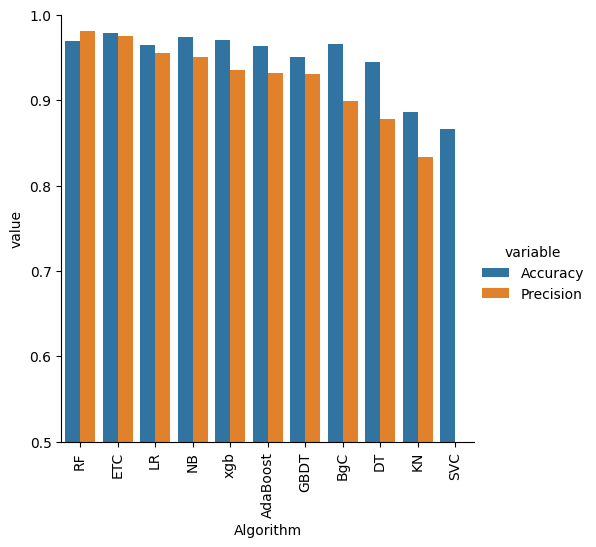

In [93]:
sns.catplot(x="Algorithm",y="value", hue="variable",data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# change the max_features parameter of TfIdf

In [94]:
temp_df= pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy_max_ft_3000':accuracies,'Precision_max_ft_3000':precisions}).sort_values('Precision_max_ft_3000',ascending=False)

In [95]:
temp_df= pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracies,'Precision_scaling':precisions}).sort_values('Precision_scaling',ascending=False)

In [96]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [97]:
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [98]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracies,'Precision_num_chars':precisions}).sort_values('Precision_num_chars',ascending=False)

In [99]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,RF,0.969052,0.981818,0.969052,0.981818,0.969052,0.981818,0.969052,0.981818
1,ETC,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410
2,LR,0.965184,0.955357,0.965184,0.955357,0.965184,0.955357,0.965184,0.955357
3,NB,0.973888,0.951220,0.973888,0.951220,0.973888,0.951220,0.973888,0.951220
4,xgb,0.970986,0.935484,0.970986,0.935484,0.970986,0.935484,0.970986,0.935484
5,AdaBoost,0.964217,0.931624,0.964217,0.931624,0.964217,0.931624,0.964217,0.931624
6,GBDT,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
7,BgC,0.966151,0.899225,0.966151,0.899225,0.966151,0.899225,0.966151,0.899225
8,DT,0.944874,0.878505,0.944874,0.878505,0.944874,0.878505,0.944874,0.878505
9,KN,0.885880,0.833333,0.885880,0.833333,0.885880,0.833333,0.885880,0.833333


In [100]:
# Voting Classifier
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [101]:
voting= VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [102]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [103]:
y_pred= voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9738878143133463
Precision 1.0


In [104]:
# Applying stacking
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [105]:
from sklearn.ensemble import StackingClassifier

In [106]:
clf= StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [107]:
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))


Accuracy 0.9796905222437138
Precision 0.9606299212598425


In [108]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))